In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
combats = pd.read_csv('combats.csv')
pokemon = pd.read_csv('pokemon.csv')
tests = pd.read_csv('tests.csv')
combats.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [5]:
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [6]:
pokemon.isnull().sum()

#               0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [7]:
pokemon.shape

(800, 12)

In [57]:
pokemon['Name'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
795    False
796    False
797    False
798    False
799    False
Name: Name, Length: 800, dtype: bool

In [3]:
pokemon.loc[pokemon['#'] == 63, 'Name'] = 'Primeape'
print(pokemon[pokemon['#'] == 63])

pokemon_clean=pokemon # żeby ci kodu dalej nie zepsuć to takie coś na razie zrobię

     #      Name    Type 1 Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
62  63  Primeape  Fighting    NaN  65     105       60       60       70   

    Speed  Generation  Legendary  
62     95           1      False  


In [4]:
pokemon_types = pokemon_clean['Type 1'].unique()
print(pokemon_types)
print(len(pokemon_types))

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']
18


In [18]:
#print sorted pokemon_types
print(pokemon_clean['Type 2'].unique())
print(len(pokemon_clean['Type 2'].unique()))

['Poison' nan 'Flying' 'Dragon' 'Ground' 'Fairy' 'Grass' 'Fighting'
 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark' 'Water' 'Electric' 'Fire' 'Ghost'
 'Bug' 'Normal']
19


In [6]:
all_types = pokemon_clean['Type 1'].tolist() + pokemon_clean['Type 2'].tolist()
all_types = pd.DataFrame(all_types, columns=['Type'])
#all_types = all_types.dropna()
all_types.head()

,Type
0,Grass
1,Grass
2,Grass
3,Grass
4,Fire


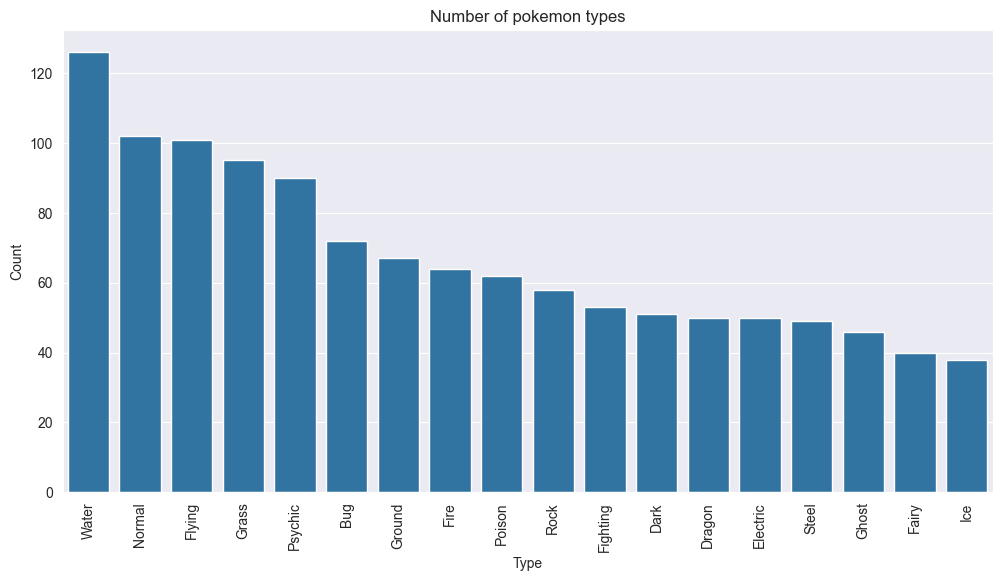

In [7]:
# countplot with pokemon types
plt.figure(figsize=(12, 6))
sns.countplot(data=all_types, x='Type', order=all_types['Type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of pokemon types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

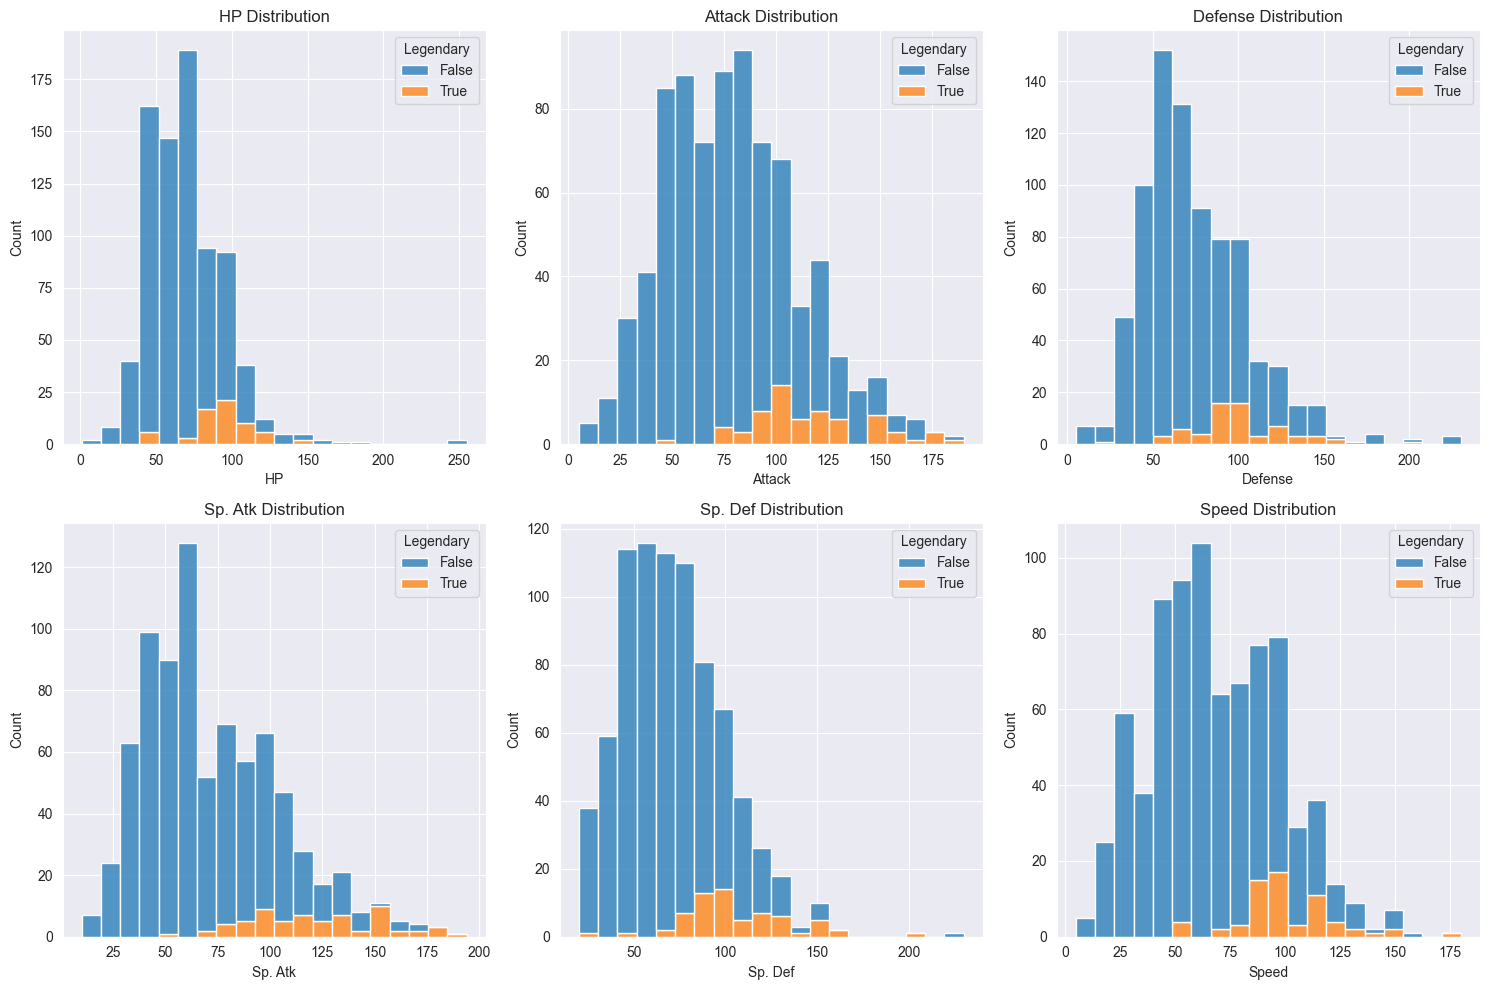

In [8]:
#create 6 subplots distribution for each statistic with different color for legendary and non legendary cumulated plot
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
labels = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
for i in range(6):
    a = i // 3
    b = i % 3
    sns.histplot(data=pokemon_clean,x=labels[i], ax=axes[a,b], bins=20, hue='Legendary', multiple='stack')
    axes[a,b].set_title(f'{labels[i]} Distribution')

plt.tight_layout()
plt.show()


In [25]:
pokemon_clean.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,400.922403,69.264080,78.968711,73.859825,72.836045,71.904881,68.244055,3.326658
std,230.919897,25.550218,32.464637,31.199180,32.739641,27.846265,29.063266,1.660292
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000
25%,201.500000,50.000000,55.000000,50.000000,49.500000,50.000000,45.000000,2.000000
50%,401.000000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.000000
75%,600.500000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.000000
max,800.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.000000


In [9]:
hp_ranges = [0,51,101,258]
hp_labels = ['low_hp', 'medium_hp', 'high_hp']
attack_ranges = [0, 62, 124, 191]
attack_labels = ['low_attack', 'medium_attack', 'high_attack']
def_ranges = [0,51, 110, 232]
def_labels = ['low_defense', 'medium_defense', 'high_defense']
sp_atk_ranges = [0,65,130,195]
sp_atk_labels = ['low_sp_atk', 'medium_sp_atk', 'high_sp_atk']
sp_def_ranges = [0,55,110,232]
sp_def_labels = ['low_sp_def', 'medium_sp_def', 'high_sp_def']
speed_ranges = [0, 60, 111, 181]
speed_labels = ['low_speed', 'medium_speed', 'high_speed']

In [10]:
 = pokemon_clean.copy()
['HP'] = pd.cut(['HP'], bins=hp_ranges, labels=hp_labels)
['Attack'] = pd.cut(['Attack'], bins=attack_ranges, labels=attack_labels)
['Defense'] = pd.cut(['Defense'], bins=def_ranges, labels=def_labels)
['Sp. Atk'] = pd.cut(['Sp. Atk'], bins=sp_atk_ranges, labels=sp_atk_labels)
['Sp. Def'] = pd.cut(['Sp. Def'], bins=sp_def_ranges, labels=sp_def_labels)
['Speed'] = pd.cut(['Speed'], bins=speed_ranges, labels=speed_labels)
.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,low_hp,low_attack,low_defense,low_sp_atk,medium_sp_def,low_speed,1,False
1,2,Ivysaur,Grass,Poison,medium_hp,low_attack,medium_defense,medium_sp_atk,medium_sp_def,low_speed,1,False
2,3,Venusaur,Grass,Poison,medium_hp,medium_attack,medium_defense,medium_sp_atk,medium_sp_def,medium_speed,1,False
3,4,Mega Venusaur,Grass,Poison,medium_hp,medium_attack,high_defense,medium_sp_atk,high_sp_def,medium_speed,1,False
4,5,Charmander,Fire,NaN,low_hp,low_attack,low_defense,low_sp_atk,low_sp_def,medium_speed,1,False


In [14]:
pokemon_clean = pokemon_clean.rename(columns={'#':'Index'})
pokemon_clean.head()

,Index,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [12]:
win_count = pd.DataFrame(combats['Winner'].value_counts())
win_count = win_count.rename(columns={'Winner': 'Index', 'count':'Win Num'})
win_count.head()

,Win Num
Winner,
163,152
438,136
154,136
428,134
314,133


In [15]:
# joining winning number to pokemon_with_labels
pokemon_clean = pd.merge(pokemon_clean, win_count, how='left', left_on='Index', right_on='Winner')
pokemon_clean.head()

,Index,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Win Num
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,37.0
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,46.0
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,89.0
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,70.0
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,55.0


In [16]:
pokemon_clean['Win Num'] = pokemon_clean['Win Num'].fillna(0)
pokemon_clean.isnull().sum()

Index           0
Name            0
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
Win Num         0
dtype: int64

In [17]:
matches = combats['First_pokemon'].tolist() + combats['Second_pokemon'].tolist()
matches = pd.DataFrame(matches, columns=['Index'])
match_count = pd.DataFrame(matches['Index'].value_counts())
match_count = match_count.rename(columns={'Index': 'Index', 'count':'Match Num'})
match_count.head()

,Match Num
Index,
163,164
344,160
667,159
214,158
758,158


In [18]:
pokemon_clean = pd.merge(pokemon_clean, match_count, how='left', left_on='Index', right_on='Index')
pokemon_clean.head()

,Index,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Win Num,Match Num
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,37.0,133.0
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,46.0,121.0
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,89.0,132.0
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,70.0,125.0
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,55.0,112.0


In [20]:
pokemon_clean['Match Num'] = pokemon_clean['Match Num'].fillna(0)
pokemon_clean.isnull().sum()

Index           0
Name            0
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
Win Num         0
Match Num       0
dtype: int64

In [21]:
pokemon_clean['Win Ratio'] = pokemon_clean['Win Num'] / pokemon_clean['Match Num']
pokemon_clean['Win Ratio'] = pokemon_clean['Win Ratio'].fillna(0)
pokemon_clean['Win Ratio'] = pokemon_clean['Win Ratio'].replace([np.inf, -np.inf], 0)
pokemon_clean.isnull().sum()

Index           0
Name            0
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
Win Num         0
Match Num       0
Win Ratio       0
dtype: int64

In [22]:
win_ratios_labels = ['low_win_ratio', 'medium_win_ratio', 'high_win_ratio']
win_ratios_ranges = [0, 0.34, 0.67, 1]
pokemon_with_labels['Win Ratio'] = pd.cut(pokemon_clean['Win Ratio'], bins=win_ratios_ranges, labels=win_ratios_labels)
pokemon_with_labels.to_csv('pokemon_with_labels.csv')

In [23]:
pokemon_with_labels.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Win Ratio
0,1,Bulbasaur,Grass,Poison,low_hp,low_attack,low_defense,low_sp_atk,medium_sp_def,low_speed,1,False,low_win_ratio
1,2,Ivysaur,Grass,Poison,medium_hp,low_attack,medium_defense,medium_sp_atk,medium_sp_def,low_speed,1,False,medium_win_ratio
2,3,Venusaur,Grass,Poison,medium_hp,medium_attack,medium_defense,medium_sp_atk,medium_sp_def,medium_speed,1,False,high_win_ratio
3,4,Mega Venusaur,Grass,Poison,medium_hp,medium_attack,high_defense,medium_sp_atk,high_sp_def,medium_speed,1,False,medium_win_ratio
4,5,Charmander,Fire,NaN,low_hp,low_attack,low_defense,low_sp_atk,low_sp_def,medium_speed,1,False,medium_win_ratio


In [24]:
#pokemon_clean = pd.merge(pokemon_clean, win_count, how='left', left_on='Index', right_on='Winner')
#pokemon_clean = pd.merge(pokemon_clean, match_count, how='left', left_on='Index', right_on='Index')
#pokemon_clean['Win Ratio'] = pokemon_clean['Win Ratio']
pokemon_clean.head()

,Index,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Win Num,Match Num,Win Ratio
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,37.0,133.0,0.278195
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,46.0,121.0,0.380165
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,89.0,132.0,0.674242
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,70.0,125.0,0.560000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,55.0,112.0,0.491071


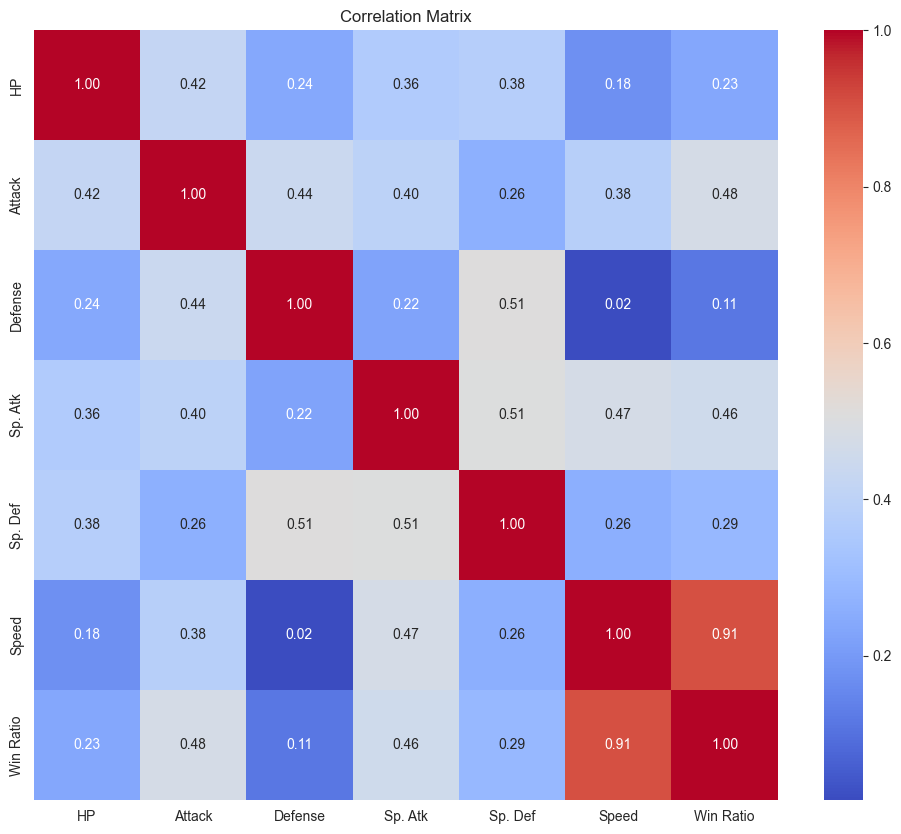

In [25]:
# correlation matrix
columns_to_correlation = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Win Ratio']
plt.figure(figsize=(12, 10))
sns.heatmap(pokemon_clean[columns_to_correlation].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [26]:
win_ratio_by_type_1 = pokemon_clean.groupby('Type 1')['Win Ratio'].mean().reset_index()
win_ratio_by_type_2 = pokemon_clean.groupby('Type 2')['Win Ratio'].mean().reset_index()
win_ratio_by_type_1['count'] = pokemon_clean.groupby('Type 1')['Type 1'].count().values
win_ratio_by_type_2['count'] = pokemon_clean.groupby('Type 2')['Type 2'].count().values
print(win_ratio_by_type_1, win_ratio_by_type_2)

      Type 1  Win Ratio  count
0        Bug   0.426281     69
1       Dark   0.609412     31
2     Dragon   0.613788     32
3   Electric   0.618478     44
4      Fairy   0.329300     17
5   Fighting   0.458001     27
6       Fire   0.579215     52
7     Flying   0.765061      4
8      Ghost   0.468901     32
9      Grass   0.421491     70
10    Ground   0.524603     32
11       Ice   0.439604     24
12    Normal   0.519183     98
13    Poison   0.433262     28
14   Psychic   0.545747     57
15      Rock   0.404852     44
16     Steel   0.424529     27
17     Water   0.456785    112       Type 2  Win Ratio  count
0        Bug   0.439055      3
1       Dark   0.594685     20
2     Dragon   0.605966     18
3   Electric   0.532644      6
4      Fairy   0.413326     23
5   Fighting   0.676791     26
6       Fire   0.633781     12
7     Flying   0.656718     97
8      Ghost   0.413582     14
9      Grass   0.403546     25
10    Ground   0.376463     35
11       Ice   0.587451     14
12    No

In [27]:
mean_win_ratio_by_type = win_ratio_by_type_1.copy()
mean_win_ratio_by_type['Win Ratio'] = (win_ratio_by_type_1['Win Ratio']* win_ratio_by_type_1['count'] + win_ratio_by_type_2['Win Ratio'] * win_ratio_by_type_2['count']) / (win_ratio_by_type_1['count'] + win_ratio_by_type_2['count'])
mean_win_ratio_by_type['count'] = win_ratio_by_type_1['count'] + win_ratio_by_type_2['count']
mean_win_ratio_by_type

,Type 1,Win Ratio,count
0,Bug,0.426813,72
1,Dark,0.603637,51
2,Dragon,0.610972,50
3,Electric,0.608178,50
4,Fairy,0.377615,40
5,Fighting,0.565332,53
6,Fire,0.589446,64
7,Flying,0.661009,101
8,Ghost,0.452065,46
9,Grass,0.416769,95


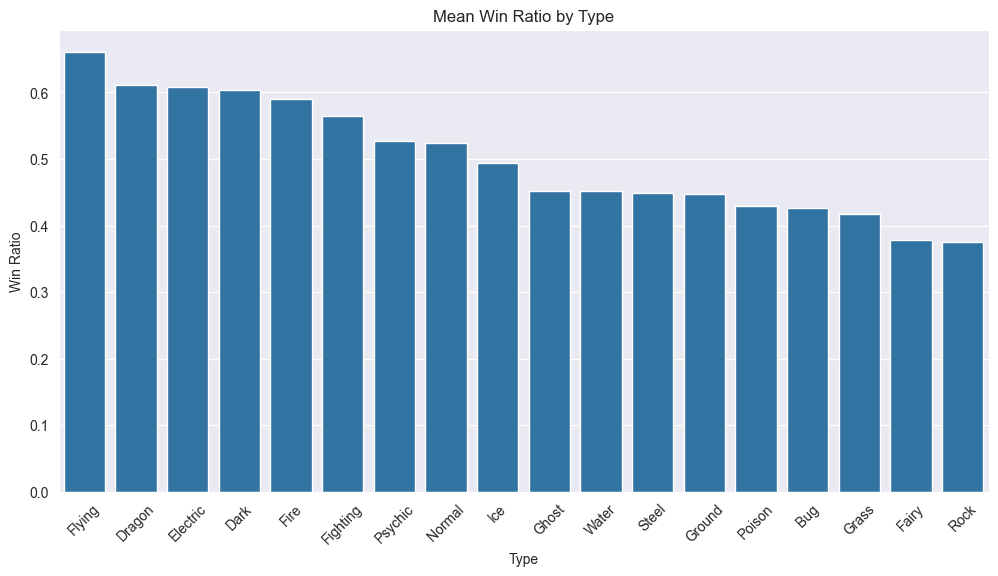

In [28]:
# plotting the mean win ratio by type
mean_win_ratio_by_type = mean_win_ratio_by_type.sort_values('Win Ratio', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_win_ratio_by_type, x='Type 1', y='Win Ratio')
plt.xticks(rotation=45)
plt.title('Mean Win Ratio by Type')
plt.xlabel('Type')
plt.ylabel('Win Ratio')
plt.show()

In [30]:
pokemon_clean['Has 2 Types'] = ~pokemon_clean['Type 2'].isnull()
win_ratio_by_types_number = pokemon_clean.groupby('Has 2 Types')['Win Ratio'].mean().reset_index()
win_ratio_by_legendary = pokemon_clean.groupby('Legendary')['Win Ratio'].mean().reset_index()
print(win_ratio_by_types_number)
print(win_ratio_by_legendary)

   Has 2 Types  Win Ratio
0        False   0.456149
1         True   0.523263
   Legendary  Win Ratio
0      False   0.466449
1       True   0.767150


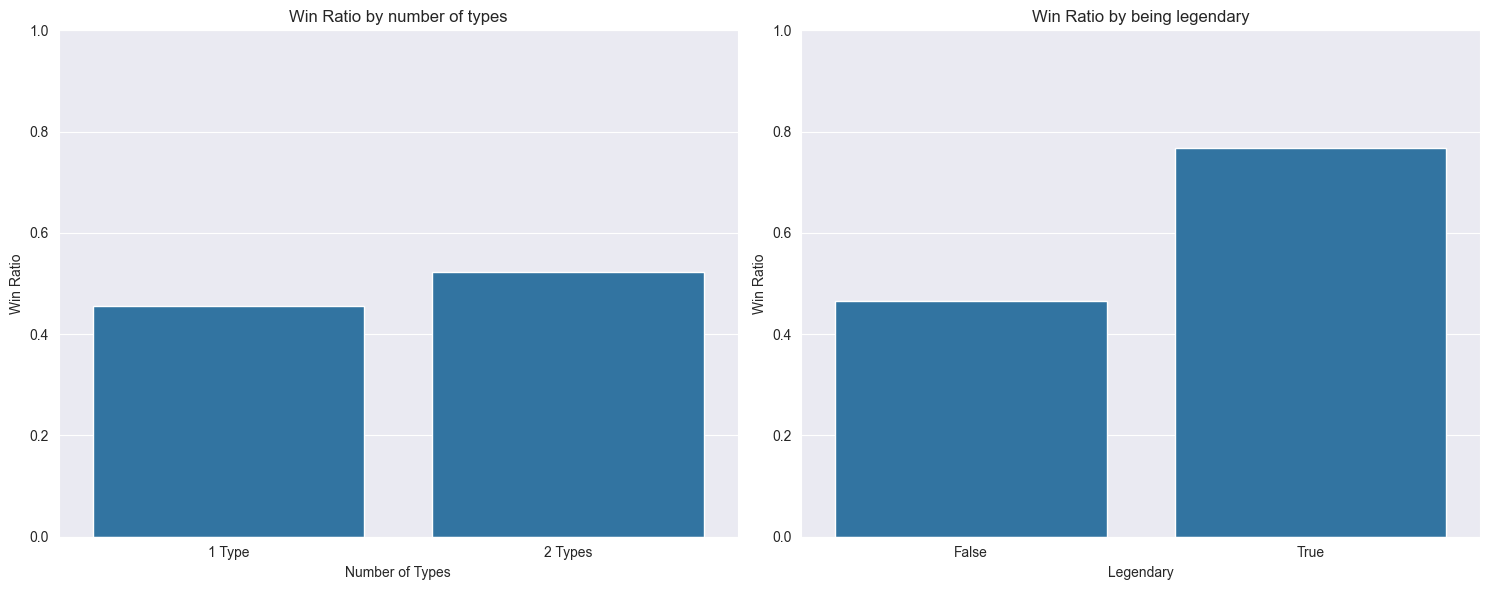

In [31]:
# plot 2 barplot for win ratio by types number and legendary
from matplotlib.ticker import FixedLocator
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(data=win_ratio_by_types_number, x='Has 2 Types', y='Win Ratio', ax=axes[0])
axes[0].set_ylim(0, 1)
axes[0].xaxis.set_major_locator(FixedLocator([0, 1]))
axes[0].set_xticklabels(['1 Type', '2 Types'])
axes[0].set_title('Win Ratio by number of types')
axes[0].set_xlabel('Number of Types')
axes[0].set_ylabel('Win Ratio')
sns.barplot(data=win_ratio_by_legendary, x='Legendary', y='Win Ratio', ax=axes[1])
axes[1].set_ylim(0, 1)
axes[1].set_title('Win Ratio by being legendary')
axes[1].set_xlabel('Legendary')
axes[1].set_ylabel('Win Ratio')
plt.tight_layout()

In [32]:
pokemon_with_labels['Has 2 Types'] = pokemon_clean['Has 2 Types']
pokemon_with_labels.to_csv('pokemon_with_labels.csv')

In [33]:
# Frequency table between has two types and legendary
frequency_table = pd.crosstab(['Has 2 Types'], pokemon_with_labels['Legendary'])
print(frequency_table)

Legendary    False  True 
Has 2 Types              
False          361     25
True           374     40


In [34]:
combats_expanded = combats.copy()
combats_expanded['Has First Won'] = combats_expanded['Winner'] == combats_expanded['First_pokemon']
first_winning_ratio = combats_expanded['Has First Won'].sum() / combats_expanded.shape[0]
print(first_winning_ratio)

0.47202


In [63]:
def pick_loser():
    losers = []
    for i in range(len(combats_expanded)):
        if combats_expanded['Has First Won'][i]:
            losers.append(combats_expanded['Second_pokemon'][i])
        else:
            losers.append(combats_expanded['First_pokemon'][i])
    return losers

In [64]:
combats_expanded['Loser'] = pick_loser()
combats_expanded['Type 1 Winner'] = combats_expanded['Winner'].map(pokemon_clean.set_index('Index')['Type 1'])
combats_expanded.head()

,First_pokemon,Second_pokemon,Winner,Has First Won,Loser,Type 1 Winner,Type 2 Winner,Type 1 Loser,Type 2 Loser,stats_diff
0,266,298,298,False,266,Grass,Dark,Grass,Dark,340
1,702,701,701,False,702,Rock,Fighting,Rock,Fighting,580
2,191,668,668,False,191,Psychic,NaN,Psychic,NaN,485
3,237,683,683,False,237,Dragon,NaN,Dragon,NaN,485
4,151,231,151,True,231,Rock,Water,Rock,Water,495


In [65]:
combats_expanded['Type 2 Winner'] = combats_expanded['Winner'].map(pokemon_clean.set_index('Index')['Type 2'])
combats_expanded['Type 1 Loser'] = combats_expanded['Loser'].map(pokemon_clean.set_index('Index')['Type 1'])
combats_expanded['Type 2 Loser'] = combats_expanded['Loser'].map(pokemon_clean.set_index('Index')['Type 2'])
combats_expanded.head()

,First_pokemon,Second_pokemon,Winner,Has First Won,Loser,Type 1 Winner,Type 2 Winner,Type 1 Loser,Type 2 Loser,stats_diff
0,266,298,298,False,266,Grass,Dark,Rock,Ground,340
1,702,701,701,False,702,Rock,Fighting,Grass,Fighting,580
2,191,668,668,False,191,Psychic,NaN,Fairy,Flying,485
3,237,683,683,False,237,Dragon,NaN,Fire,NaN,485
4,151,231,151,True,231,Rock,Water,Bug,Rock,495


In [37]:
pokemon_clean['normal_stats'] = pokemon_clean['HP'] + pokemon_clean['Attack'] + pokemon_clean['Defense'] + pokemon_clean['Speed']
pokemon_clean['special_stats'] = pokemon_clean['Sp. Atk'] + pokemon_clean['Sp. Def']
pokemon_clean['total_stats'] = pokemon_clean['normal_stats'] + pokemon_clean['special_stats']
pokemon_clean.head()

,Index,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Win Num,Match Num,Win Ratio,Has 2 Types,normal_stats,special_stats,total_stats
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,37.0,133.0,0.278195,True,188,130,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,46.0,121.0,0.380165,True,245,160,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,89.0,132.0,0.674242,True,325,200,525
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,70.0,125.0,0.560000,True,383,242,625
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,55.0,112.0,0.491071,False,199,110,309


C:\Users\magda\AppData\Local\Temp\ipykernel_4636\2006820679.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)
C:\Users\magda\AppData\Local\Temp\ipykernel_4636\2006820679.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)
C:\Users\magda\AppData\Local\Temp\ipykernel_4636\2006820679.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)
C:\Users\magda\AppData\Local\Temp\ipykernel_4636\2006820679.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax

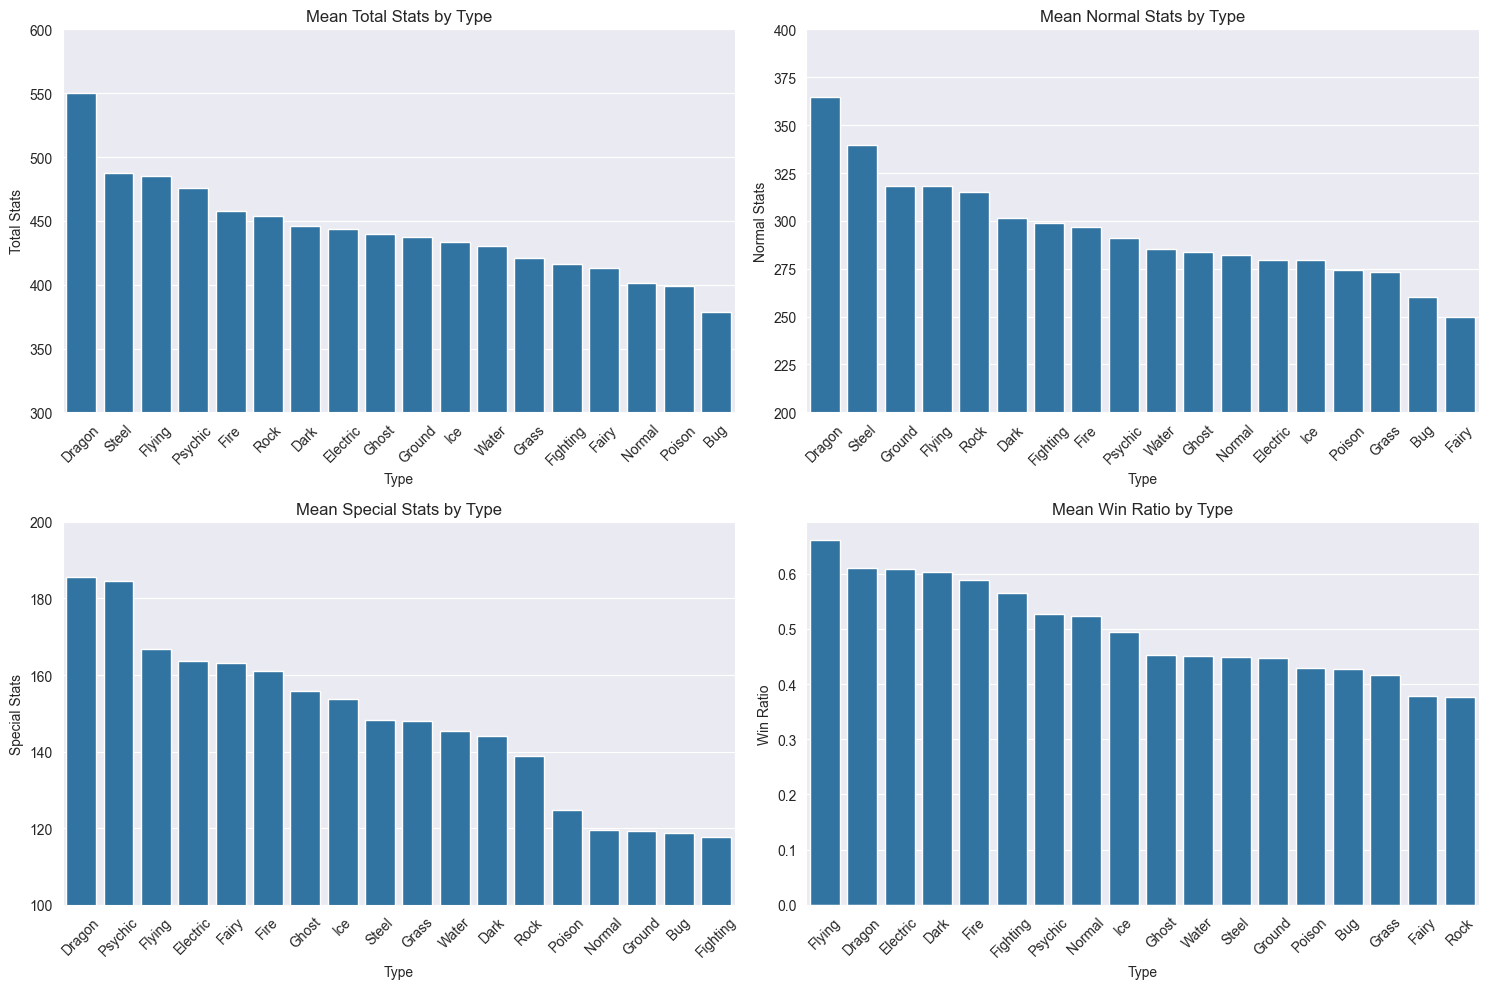

In [50]:
mean_total_stats_by_type = pokemon_clean.groupby('Type 1')['total_stats'].mean().reset_index()
mean_total_stats_by_type = mean_total_stats_by_type.sort_values('total_stats', ascending=False)
mean_normal_stats_by_type = pokemon_clean.groupby('Type 1')['normal_stats'].mean().reset_index()
mean_normal_stats_by_type = mean_normal_stats_by_type.sort_values('normal_stats', ascending=False)
mean_special_stats_by_type = pokemon_clean.groupby('Type 1')['special_stats'].mean().reset_index()
mean_special_stats_by_type = mean_special_stats_by_type.sort_values('special_stats', ascending=False)


fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.barplot(data=mean_total_stats_by_type, x='Type 1', y='total_stats', ax=axes[0, 0])
axes[0, 0].set_title('Mean Total Stats by Type')
axes[0, 0].set_xlabel('Type')
axes[0, 0].set_ylabel('Total Stats')
axes[0, 0].set_ylim(300, 600)
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)
sns.barplot(data=mean_normal_stats_by_type, x='Type 1', y='normal_stats', ax=axes[0, 1])
axes[0, 1].set_title('Mean Normal Stats by Type')
axes[0, 1].set_xlabel('Type')
axes[0, 1].set_ylabel('Normal Stats')
axes[0, 1].set_ylim(200, 400)
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)
sns.barplot(data=mean_special_stats_by_type, x='Type 1', y='special_stats', ax=axes[1, 0])
axes[1, 0].set_title('Mean Special Stats by Type')
axes[1, 0].set_xlabel('Type')
axes[1, 0].set_ylabel('Special Stats')
axes[1, 0].set_ylim(100, 200)
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)
sns.barplot(data=mean_win_ratio_by_type, x='Type 1', y='Win Ratio', ax=axes[1, 1])
axes[1, 1].set_title('Mean Win Ratio by Type')
axes[1, 1].set_xlabel('Type')
axes[1, 1].set_ylabel('Win Ratio')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

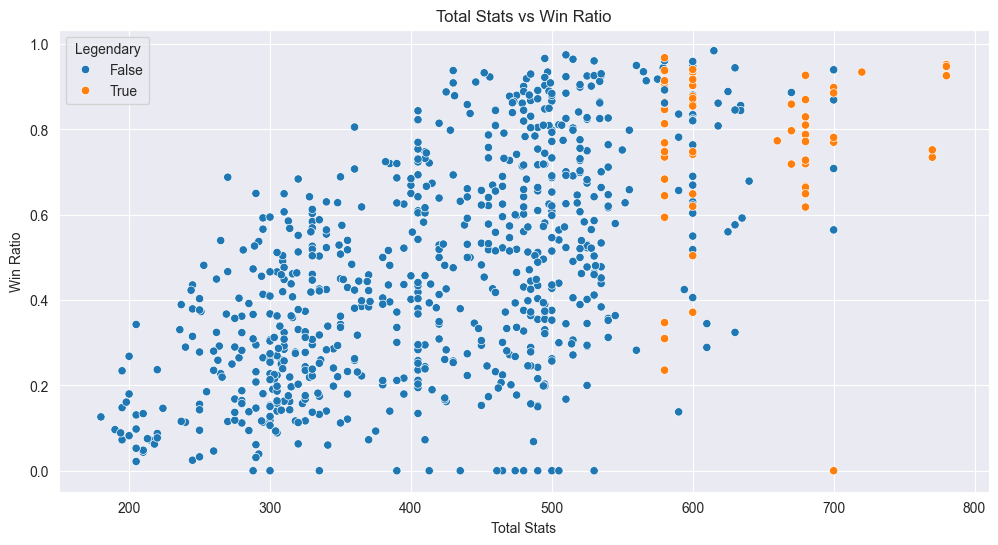

In [51]:
# Scatterplot of total stats vs win ratio
plt.figure(figsize=(12, 6))
sns.scatterplot(data=pokemon_clean, x='total_stats', y='Win Ratio', hue='Legendary')
plt.title('Total Stats vs Win Ratio')
plt.xlabel('Total Stats')
plt.ylabel('Win Ratio')
plt.show()

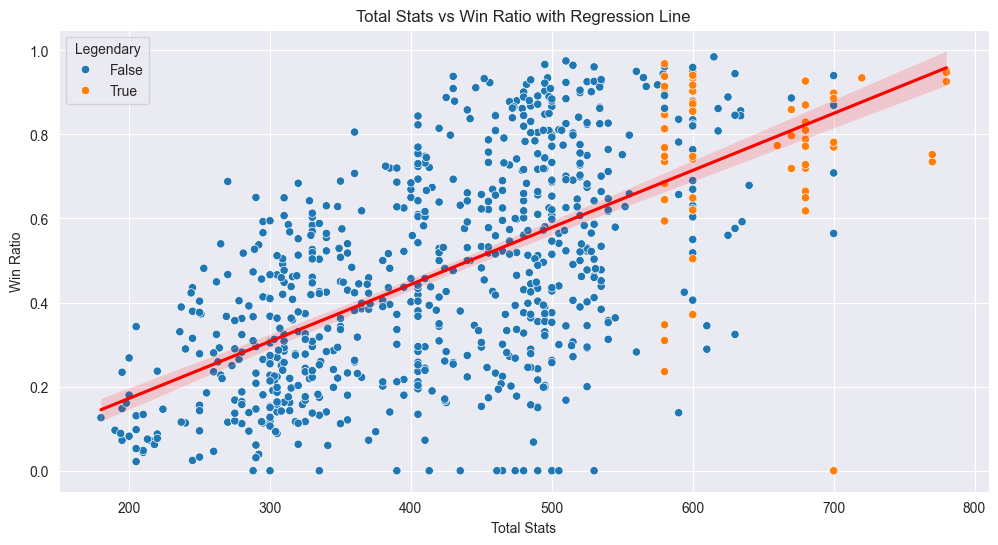

In [55]:
# Adding regression line to the scatterplot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=pokemon_clean, x='total_stats', y='Win Ratio', hue='Legendary')
sns.regplot(data=pokemon_clean, x='total_stats', y='Win Ratio', line_kws={'color':'red'}, scatter=False)
plt.title('Total Stats vs Win Ratio with Regression Line')
plt.xlabel('Total Stats')
plt.ylabel('Win Ratio')
plt.show()


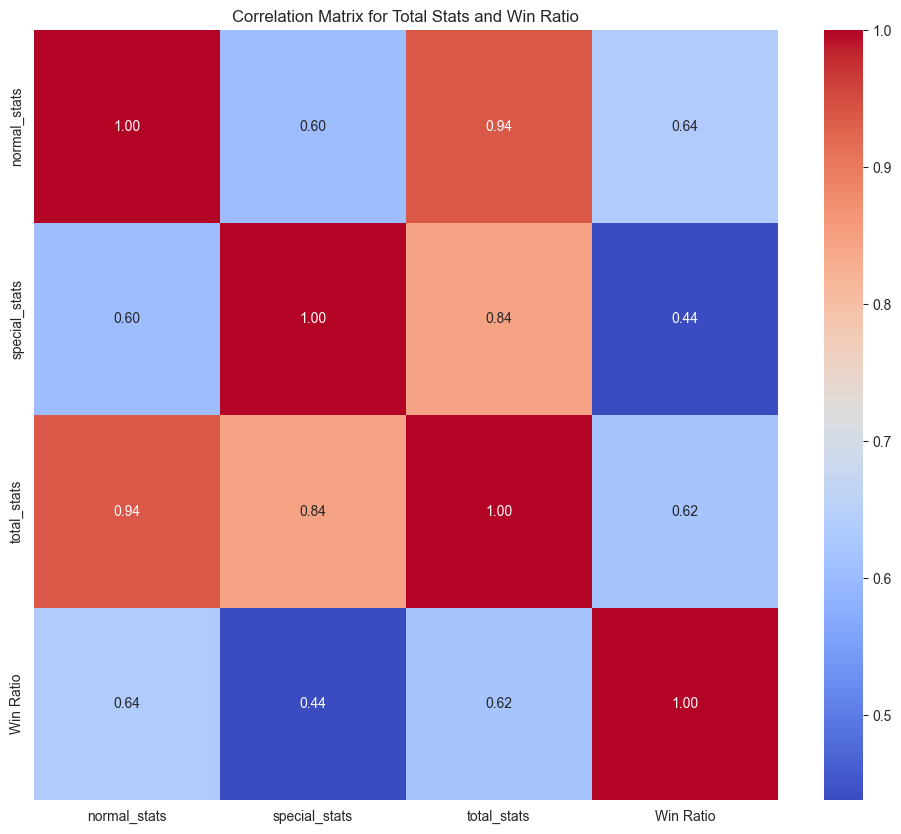

In [56]:
# Correlation matrix for total stats and win ratio
plt.figure(figsize=(12, 10))
sns.heatmap(pokemon_clean[['normal_stats', 'special_stats', 'total_stats', 'Win Ratio']].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix for Total Stats and Win Ratio')
plt.show()

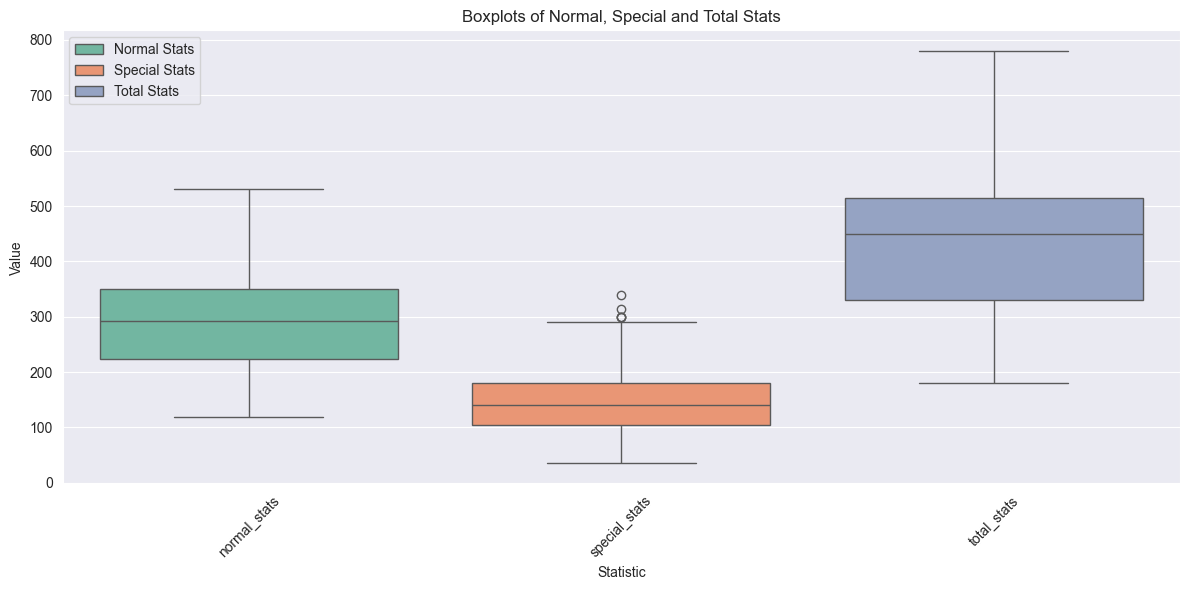

In [58]:
# Box plots for normal, special and total stats
stats_columns = ['normal_stats', 'special_stats', 'total_stats']
plt.figure(figsize=(12, 6))
sns.boxplot(data=pokemon_clean[stats_columns], palette='Set2')
plt.title('Boxplots of Normal, Special and Total Stats')
plt.xlabel('Statistic')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(['Normal Stats', 'Special Stats', 'Total Stats'])
plt.tight_layout()
plt.show()

In [67]:
# Creating feature columns for combats
columns_to_difference = ['total_stats', 'Attack', 'Sp. Atk', 'Speed']
for column in columns_to_difference:
    combats_expanded[column + '_diff'] = combats_expanded['Winner'].map(pokemon_clean.set_index('Index')[column]) - combats_expanded['Loser'].map(pokemon_clean.set_index('Index')[column])

combats_expanded.head()

,First_pokemon,Second_pokemon,Winner,Has First Won,Loser,Type 1 Winner,Type 2 Winner,Type 1 Loser,Type 2 Loser,stats_diff,total_stats_diff,Attack_diff,Sp. Atk_diff,Speed_diff
0,266,298,298,False,266,Grass,Dark,Rock,Ground,40,40,6,15,19
1,702,701,701,False,702,Rock,Fighting,Grass,Fighting,0,0,39,-18,0
2,191,668,668,False,191,Psychic,NaN,Fairy,Flying,80,80,35,45,0
3,237,683,683,False,237,Dragon,NaN,Fire,NaN,235,235,80,-10,28
4,151,231,151,True,231,Rock,Water,Bug,Rock,-10,-10,50,105,50


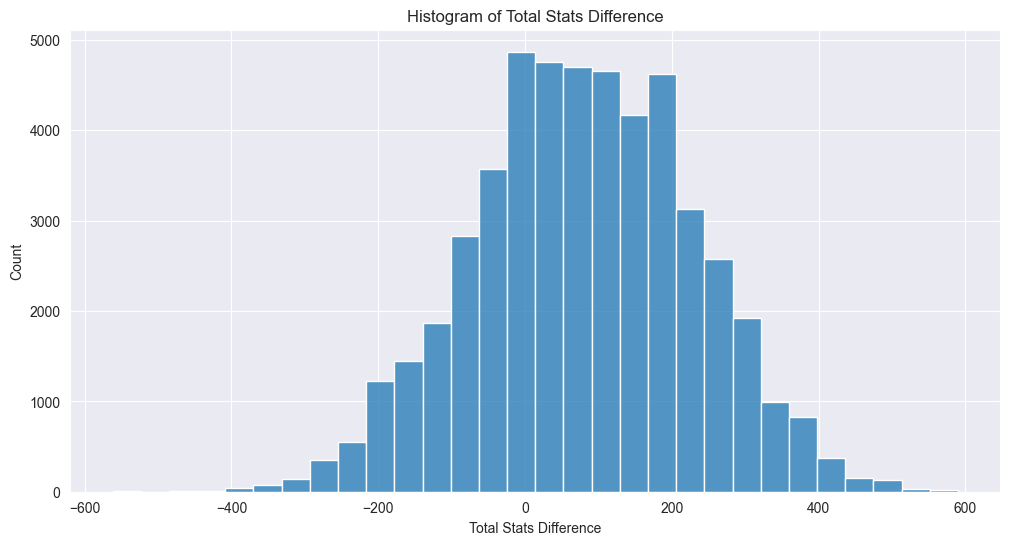

In [73]:
# Histogram of total stats difference
plt.figure(figsize=(12, 6))
sns.histplot(data=combats_expanded, x='total_stats_diff', bins=30)
plt.title('Histogram of Total Stats Difference')
plt.xlabel('Total Stats Difference')
plt.ylabel('Count')
plt.show()

In [78]:
diff_means = []
diff_medians = []

for column in columns_to_difference:
    mean_diff = combats_expanded[column + '_diff'].mean()
    diff_means.append(mean_diff)
    median_diff = combats_expanded[column + '_diff'].median()
    diff_medians.append(median_diff)
    print(f"{column}: mean diff = {mean_diff:.2f}, median diff = {median_diff:.2f}")

total_stats: mean diff = 79.78, median diff = 80.00
Attack: mean diff = 16.67, median diff = 15.00
Sp. Atk: mean diff = 16.07, median diff = 15.00
Speed: mean diff = 27.98, median diff = 25.00


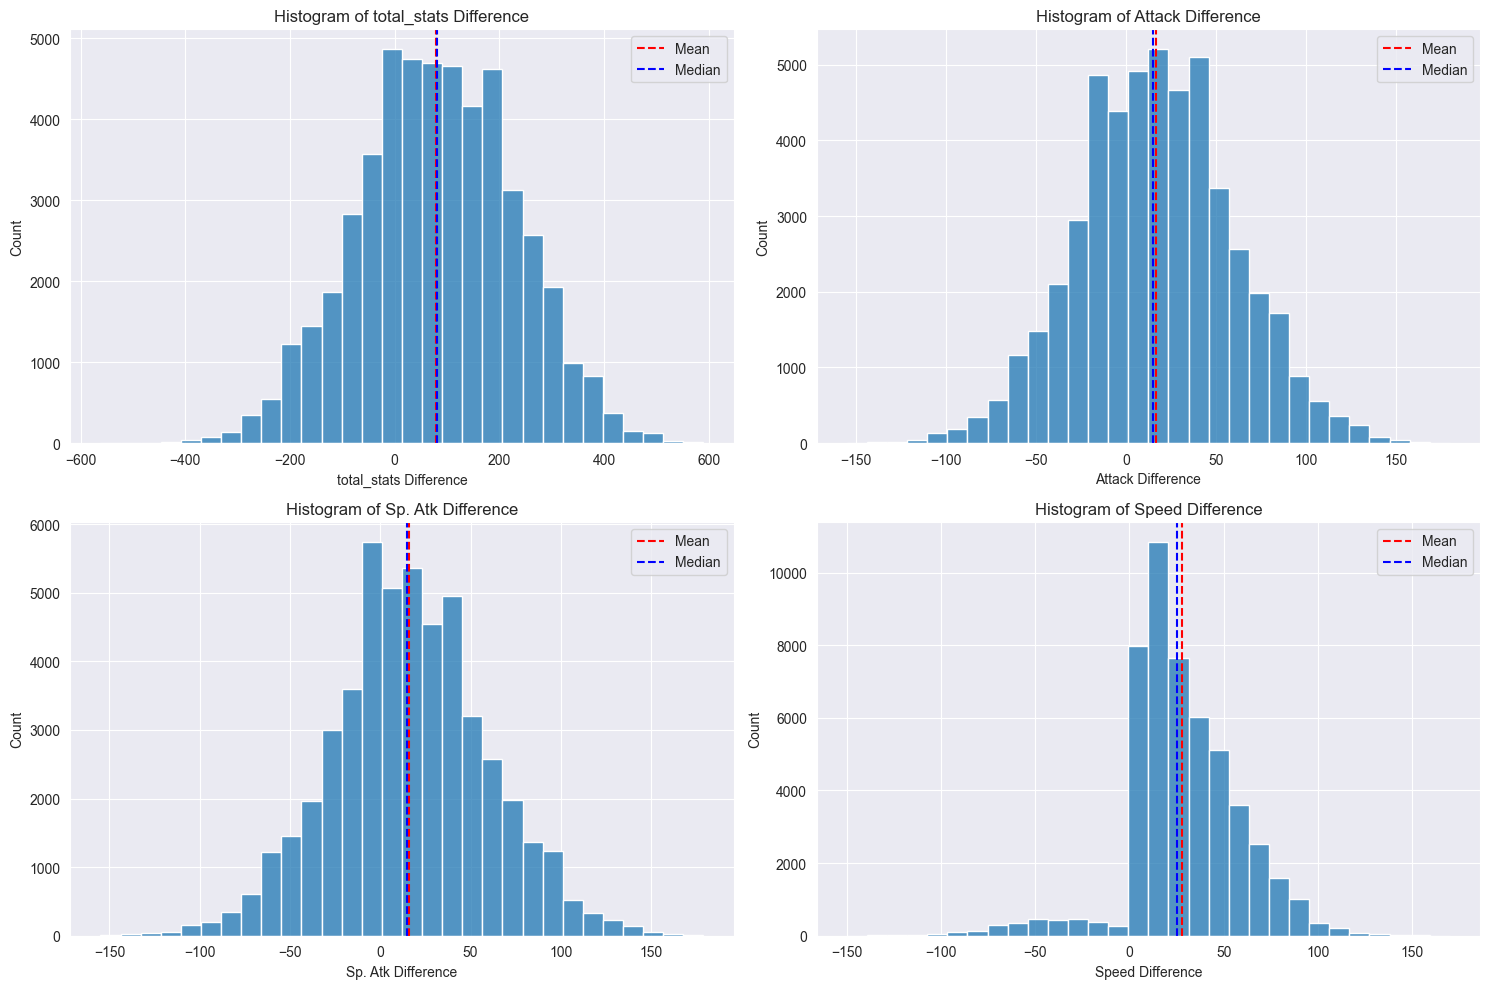

In [88]:
# Histograms of all stats difference with marked mean and median
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for column in columns_to_difference:
    a = (columns_to_difference.index(column)) // 2
    b = (columns_to_difference.index(column)) % 2
    sns.histplot(data=combats_expanded, x=column + '_diff', ax=axes[a, b], bins=30)
    axes[a, b].axvline(diff_means[columns_to_difference.index(column)], color='red', linestyle='--', label='Mean')
    axes[a, b].axvline(diff_medians[columns_to_difference.index(column)], color='blue', linestyle='--', label='Median')
    axes[a, b].set_title(f'Histogram of {column} Difference')
    axes[a, b].set_xlabel(f'{column} Difference')
    axes[a, b].set_ylabel('Count')
    axes[a, b].legend()
plt.tight_layout()
plt.show()

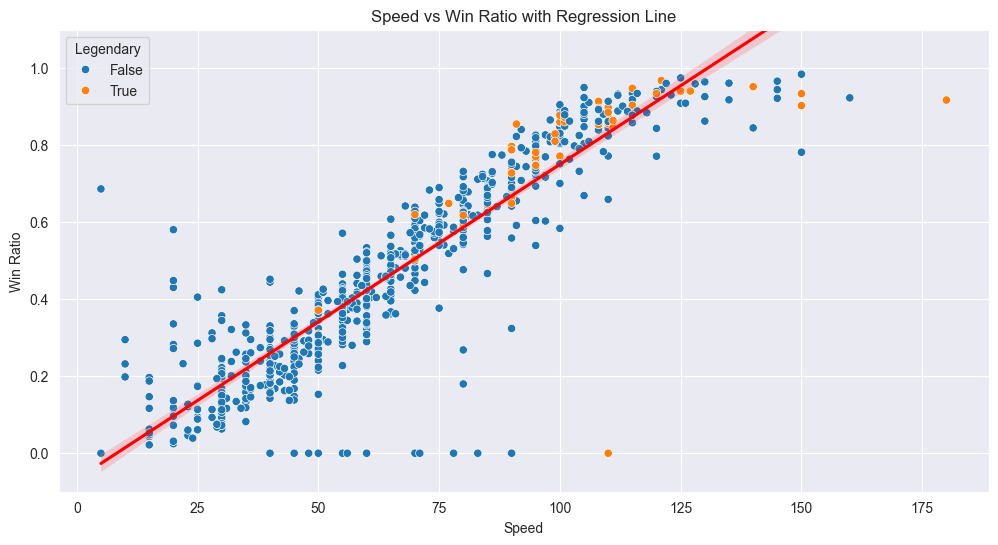

In [82]:
# Scatter plot with regression line to illustrate correlation between speed and win ratio
plt.figure(figsize=(12, 6))
sns.scatterplot(data=pokemon_clean, x='Speed', y='Win Ratio', hue='Legendary')
sns.regplot(data=pokemon_clean, x='Speed', y='Win Ratio', line_kws={'color':'red'}, scatter=False)
plt.ylim(-0.1, 1.1)
plt.title('Speed vs Win Ratio with Regression Line')
plt.xlabel('Speed')
plt.ylabel('Win Ratio')
plt.show()


In [87]:
# Percentage of wins by speed difference
sum_positive_diff = combats_expanded[combats_expanded['Speed_diff'] > 0].shape[0]
faster_wins_ratio = sum_positive_diff / combats_expanded.shape[0]
print(f"Percentage of wins by speed difference: {faster_wins_ratio:.2%}")

Percentage of wins by speed difference: 91.40%


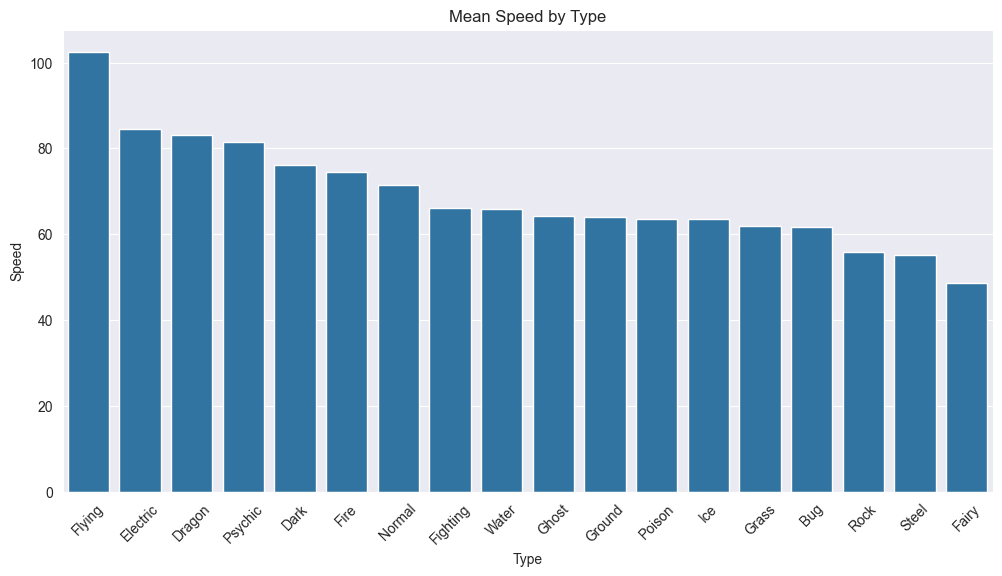

In [90]:
# mean stats for each type
mean_stats_by_type = pokemon_clean.groupby('Type 1')[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].mean().reset_index()
mean_stats_by_type = mean_stats_by_type.sort_values('Speed', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_stats_by_type, x='Type 1', y='Speed')
plt.xticks(rotation=45)
plt.title('Mean Speed by Type')
plt.xlabel('Type')
plt.ylabel('Speed')
plt.show()

In [91]:
# Create pivot table for type matchup
type_matchup = combats_expanded.pivot_table(index='Type 1 Winner', columns='Type 1 Loser', values='Winner', aggfunc='count', fill_value=0)
type_matchup


Type 1 Loser,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Type 1 Winner,,,,,,,,,,,,,,,,,,
Bug,386,112,97,126,116,116,198,8,162,396,160,144,412,151,274,223,136,555
Dark,197,74,77,94,66,52,127,6,95,240,90,81,271,83,275,181,103,335
Dragon,245,72,75,97,9,83,143,4,105,216,95,80,275,119,148,194,112,418
Electric,347,116,81,134,108,123,196,5,163,306,21,116,418,145,239,204,150,498
Fairy,74,17,75,24,25,21,31,3,28,59,24,24,60,23,37,57,25,100
Fighting,155,51,40,56,41,65,76,0,18,152,61,55,195,75,87,132,70,214
Fire,401,122,109,131,111,140,215,8,157,385,138,134,466,151,215,216,159,544
Flying,30,17,18,11,8,10,21,1,19,27,17,16,44,16,21,16,18,52
Ghost,194,47,48,51,34,113,87,4,83,173,74,62,245,83,130,128,87,234


In [93]:
# Sum the values in the pivot table to get the total number of matches for each type matchup
type_matchup_sum = type_matchup + type_matchup.T

# Calculate the percentage of wins for each type matchup
type_matchup_percent = type_matchup.div(type_matchup_sum, fill_value=0) * 100
type_matchup_percent = type_matchup_percent.round(1)

type_matchup_percent

Type 1 Loser,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Type 1 Winner,,,,,,,,,,,,,,,,,,
Bug,50.0,36.2,28.4,26.6,61.1,42.8,33.1,21.1,45.5,51.8,47.8,48.8,38.6,46.6,42.4,45.8,47.1,46.1
Dark,63.8,50.0,51.7,44.8,79.5,50.5,51.0,26.1,66.9,72.3,60.8,68.1,54.7,66.4,94.5,73.6,67.3,64.4
Dragon,71.6,48.3,50.0,54.5,10.7,67.5,56.7,18.2,68.6,69.0,69.3,69.0,57.4,68.8,53.6,74.6,79.4,71.6
Electric,73.4,55.2,45.5,50.0,81.8,68.7,59.9,31.2,76.2,66.7,9.6,71.2,61.8,72.1,56.6,71.3,71.1,69.8
Fairy,38.9,20.5,89.3,18.2,50.0,33.9,21.8,27.3,45.2,29.1,29.3,40.0,24.3,29.9,26.8,40.7,37.3,31.2
Fighting,57.2,49.5,32.5,31.3,66.1,50.0,35.2,0.0,13.7,56.3,49.2,59.1,44.0,56.4,36.9,68.0,60.3,45.3
Fire,66.9,49.0,43.3,40.1,78.2,64.8,50.0,27.6,64.3,70.4,51.9,68.4,54.1,67.1,48.0,60.3,68.5,58.4
Flying,78.9,73.9,81.8,68.8,72.7,100.0,72.4,50.0,82.6,75.0,89.5,80.0,72.1,80.0,60.0,66.7,85.7,76.5
Ghost,54.5,33.1,31.4,23.8,54.8,86.3,35.7,17.4,50.0,49.3,46.5,50.4,50.6,57.2,45.0,61.5,55.1,46.8


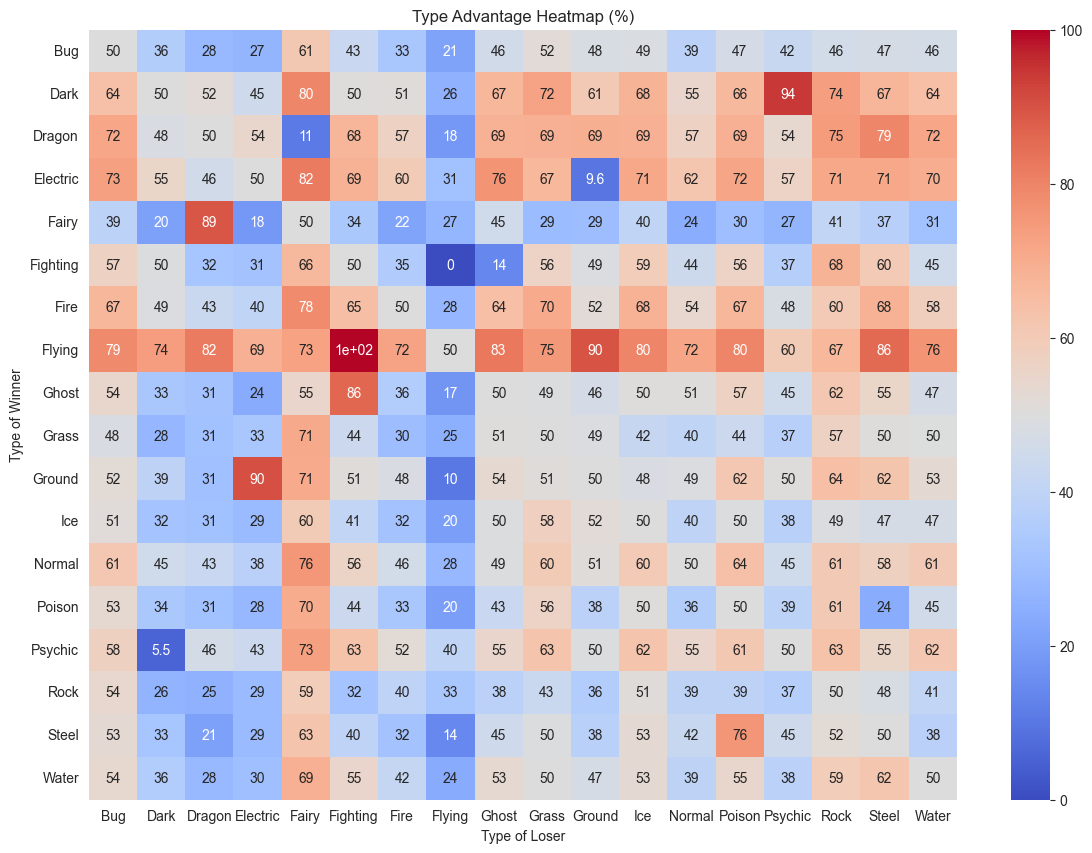

In [97]:
plt.figure(figsize=(14,10))
sns.heatmap(type_matchup_percent, annot=True, cmap='coolwarm')
plt.title('Type Advantage Heatmap (%)')
plt.xlabel('Type of Loser')
plt.ylabel('Type of Winner')
plt.show()
